In [36]:
import matplotlib.pyplot as plt
from chain_main3 import chain_main_class
from step_chain import step_chain

In [37]:
a = chain_main_class()
chain = step_chain()
chain.Start()

Loading Data...
Moving Graph...
Filtering Data...
Autocorrelating Data...
Finding peak...
Calculating peak interval...
Calculating sin...
Saving Data...


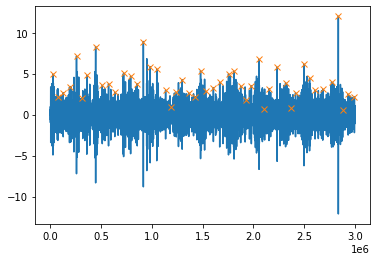

In [5]:
a.load_data()
a.move_graph()
a.X_trans_time()
#auto_bandpass에 데이터와 검증 주파수 범위, fs를 입력하면 peak_plot까지 자동으로 수행한다.
a.auto_bandpass(a,10000,14000,50000)

In [38]:
from PIL import Image
import io
import numpy as np
import base64

In [60]:
# 소켓을 사용하기 위해서는 socket을 import해야 한다.
import socket
# 로컬은 127.0.0.1의 ip로 접속한다.
HOST = '192.168.0.14'
# port는 위 서버에서 설정한 9999로 접속을 한다.
PORT = 9999
# 소켓을 만든다.
client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
# connect함수로 접속을 한다.

client_socket.connect((HOST, PORT))# 소켓을 사용하기 위해서는 socket을 import해야 한다.

In [ ]:
client_socket.sendall(("ip\x01"+strd.decode("utf-8")).encode())

In [40]:
import json
from collections import OrderedDict

In [53]:

data = client_socket.recv(1024)
# 데이터를 수신한다.
msg = " "
msg = data.decode()

data = json.loads(msg)


In [54]:
print('Received from : ', msg)

Received from :  {
  "Type": "Step",
  "Name": "1호기",
  "Content": "Bandpass",
  "Data": "",
  "Time": "2020-07-22 오후 4:22:49",
  "Comment": ""
}


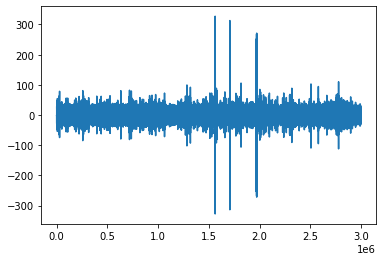

In [55]:
clt_data = OrderedDict()

clt_data['Name'] = data['Name']
clt_data['Content'] = data['Content']
clt_data['Time'] = data['Time']
clt_data['Comment'] = data['Comment']


#json의 구동체인 부분을 타입별로 나눠준다.
if data['Type'] == 'RS':    
    clt_data['Type'] = 'RS'           
    if data['Content'] == 'Peak':
        a.peak_plot()
        plt.savefig('rs_peak.png')
        with open("rs_peak.png", "rb") as imageFile:
            rs_peak = base64.b64encode(imageFile.read())
            clt_data['Data'] = rs_peak.decode("utf-8")
    elif data['Content'] == 'Raw':
        a.print_row()
        plt.savefig('rs_raw.png')
        with open("rs_raw.png", "rb") as imageFile:
            rs_raw = base64.b64encode(imageFile.read())
            clt_data['Data'] = rs_raw.decode("utf-8")
    elif data['Content'] == 'bandpass':
        a.print_bandpass()
        plt.savefig('rs_bandpass.png')
        with open("rs_bandpass.png", "rb") as imageFile:
            rs_bandpass = base64.b64encode(imageFile.read())
            clt_data['Data'] = rs_bandpass.decode("utf-8")
    elif data['Content'] == 'Sin':
            clt_data['Data'] = a.cal_sin()
            
elif data["Type"] == "Step":
    clt_data['Type'] = 'Step'
    if data["Content"] == "Sin":
        chain.cal_sin()
        clt_data['Data'] = chain.elongation_result[0]
    elif data["Content"] == "Raw":
        chain.show_graph("row")
        with open("GG.png", "rb") as imageFile:
            strd = base64.b64encode(imageFile.read())
            clt_data['Data'] = strd.decode("utf-8")
    elif data["Content"] == "Bandpass":
        chain.show_graph("bandpass")
        with open("GG.png", "rb") as imageFile:
            strd = base64.b64encode(imageFile.read())
            clt_data['Data'] = strd.decode("utf-8")
    elif data["Content"] == "Peak":
        chain.show_graph("peak")
        with open("GG.png", "rb") as imageFile:
            strd = base64.b64encode(imageFile.read())
            clt_data['Data'] = strd.decode("utf-8")
    elif data["Content"] == "Autocorrelate":
        chain.show_graph("autocorrelate") 
        with open("GG.png", "rb") as imageFile:
            strd = base64.b64encode(imageFile.read())
            clt_data['Data'] = strd.decode("utf-8")
            

In [30]:
type(clt_data["Data"])

bytes

In [32]:
type(strd.decode("utf-8").encode())

bytes

In [13]:
chain.elongation_result[0]

2.2918526612893158

In [56]:
jsonString = json.dumps(clt_data)

In [61]:
#json을 스트링으로 바꿔서 보내기

client_socket.sendall(jsonString.encode())

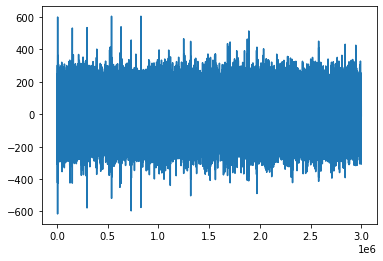

In [17]:
chain.show_graph("row")
with open("GG.png", "rb") as imageFile:
    strd = base64.b64encode(imageFile.read())
client_socket.sendall(("ip\x01"+strd.decode("utf-8")).encode())

In [ ]:
client_socket.close()